In [1]:
import os
if os.getcwd().endswith("Examples"):
    os.chdir('../')

from cdrift.approaches import martjushev
from cdrift import evaluation

from pm4py.objects.log.importer.xes import importer as xes_importer
import tkinter as tk
from tkinter import filedialog
import matplotlib.pyplot as plt
from pathlib import Path

# Timing
from timeit import default_timer
from datetime import datetime as dt

c:\Users\Cam\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Choose an Event Log ##

In [2]:
root = tk.Tk()
root.withdraw()
root.lift()

file_path = filedialog.askopenfilename(filetypes=[("XES Event Log","*.xes")])
print(f"Chosen Log: {Path(file_path).stem}")
log = xes_importer.apply(file_path)

Chosen Log: Atomic_Size2_ConditionalToSequence


parsing log, completed traces :: 100%|██████████| 2999/2999 [00:04<00:00, 733.43it/s]


### Parameters / Constants ###

In [3]:
WINDOW_SIZE = 200
MEASURE_WINDOW = None
PVALUE = 0.55
TRUE_CHANGEPOINTS = [999,1999]

#### Detect Change Points ####

In [4]:
start_j = default_timer()
cp_j, p_j = martjushev.detectChange_JMeasure_KS(log, WINDOW_SIZE, PVALUE, True, MEASURE_WINDOW)
calc_duration_j = default_timer() - start_j
start_wc = default_timer()
cp_wc, p_wc = martjushev.detectChange_WindowCount_KS(log, WINDOW_SIZE, PVALUE, True, MEASURE_WINDOW)
calc_duration_wc = default_timer() - start_wc

print(f"J Measure Extraction detected {cp_j}.")
print(f"Window Count Extraction detected {cp_wc}.")

Extracting Signal :: 100%|██████████| 1764/1764 [02:11<00:00, 13.42it/s]
Applying Recursive Bisection Algorithm. Traces Completed :: 100%|██████████| 2599/2599 [07:25<00:00,  5.84it/s]
Extracting Signal :: 100%|██████████| 1764/1764 [01:13<00:00, 24.02it/s]
Applying Recursive Bisection Algorithm. Traces Completed :: 100%|██████████| 2599/2599 [06:10<00:00,  7.02it/s]

J Measure Extraction detected [924, 1956].
Window Count Extraction detected [].


### Plotting ###

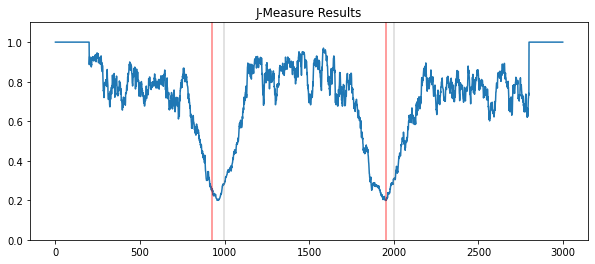

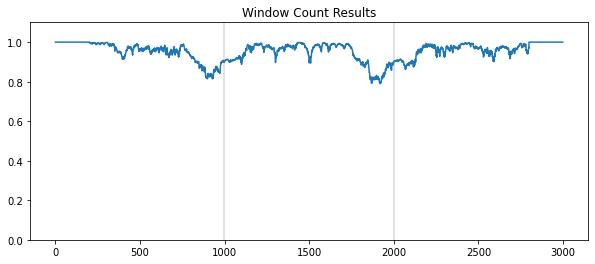

In [5]:
def plotPvals(sig, cp, known_cp,title):
    fig = plt.figure(figsize=(10,4))
    plt.plot(sig)
    for c in cp:
        plt.axvline(x=c, color="red", alpha=0.5)
    for c in known_cp:
        plt.axvline(x=c, color="grey", alpha=0.3)
    plt.ylim(0,1.1)
    plt.title(title)
    plt.show()

plotPvals(p_j,cp_j,TRUE_CHANGEPOINTS, "J-Measure Results")
plotPvals(p_wc,cp_wc,TRUE_CHANGEPOINTS, "Window Count Results")

### Evaluation ###

In [8]:
f1_j = evaluation.F1_Score(detected=cp_j, known=TRUE_CHANGEPOINTS, lag=200)
f1_wc = evaluation.F1_Score(detected=cp_wc, known=TRUE_CHANGEPOINTS, lag=200)

print(f"J Measure Extraction detected {cp_j} with an F1-Score of {f1_j}. This took {dt.strftime(dt.utcfromtimestamp(calc_duration_j), '%H:%M:%S')}.")
print(f"Window Count Extraction detected {cp_wc} with an F1-Score of {f1_wc}. This took {dt.strftime(dt.utcfromtimestamp(calc_duration_wc), '%H:%M:%S')}.")

print(f"\nJ Measure Average Lag: {evaluation.get_avg_lag(detected_changepoints=cp_j, actual_changepoints=TRUE_CHANGEPOINTS, lag=200)} (Cases)")
print(f"Window Count Average Lag: {evaluation.get_avg_lag(detected_changepoints=cp_wc, actual_changepoints=TRUE_CHANGEPOINTS, lag=200)} (Cases)")

J Measure Extraction detected [924, 1956] with an F1-Score of 1.0. This took 00:09:36.
Window Count Extraction detected [] with an F1-Score of warn. This took 00:07:23.

J Measure Average Lag: 59.0 (Cases)
Window Count Average Lag: nan (Cases)
